In [27]:
from Vanilla_GAN import GAN
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

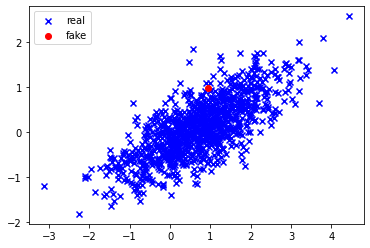

In [51]:
x_dim = 2
x_n = 1024

x_shape = (x_n, x_dim)
batch_size = 128

A = np.random.rand(x_dim, x_dim)
cov = np.dot(A, A.transpose())
mean = np.random.rand(x_dim)

x = np.random.multivariate_normal(mean=mean, cov=cov, size=(x_n, 1)).reshape(x_shape)
tensor_x = torch.Tensor(x)
if x_dim == 2:
    GAN.scatter_2d(x, np.random.rand(1, 2))
elif x_dim == 3:
    GAN.scatter_3d(x, np.random.rand(1, 3))


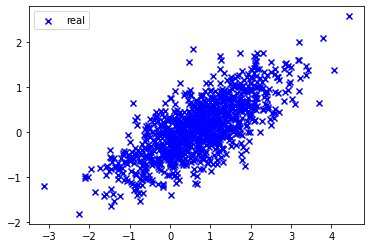

In [52]:
plt.scatter(x[:, 0], x[:, 1], c='b', marker='x', label='real')
plt.legend()

In [30]:
dataset = TensorDataset(tensor_x, torch.ones_like(tensor_x)) # create your datset
dataloader = DataLoader(dataset, batch_size=64) # create your dataloader

In [48]:
params = {'gen': {'x_dim': x_dim,
                  'hidden_dim': 6, 
                  'lr': 1e-4},
          'disc': {'x_dim': x_dim,
                  'hidden_dim': 6, 
                  'lr': 1e-4},
          'z_dim': 1
         }


In [49]:
gan = GAN(params)

epoch: 1, step: 16


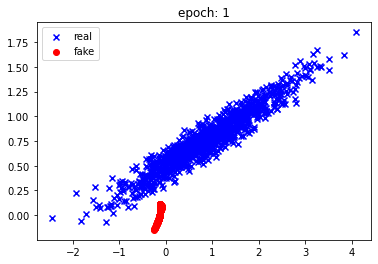

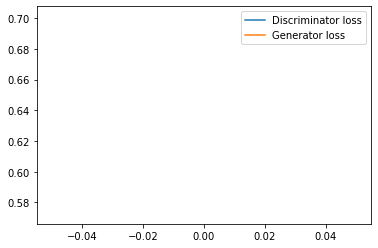

epoch: 2, step: 32


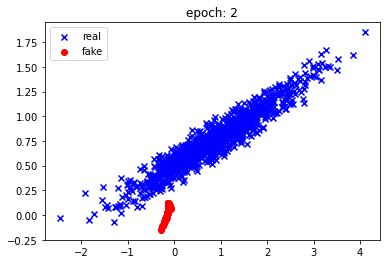

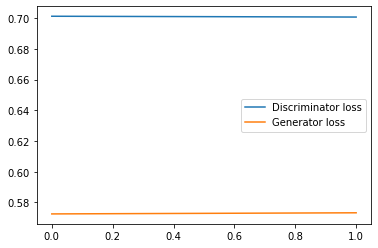

epoch: 3, step: 48


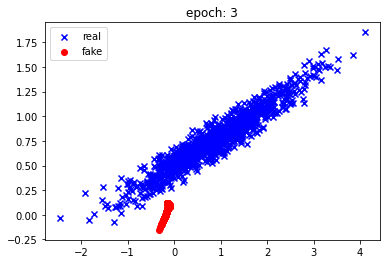

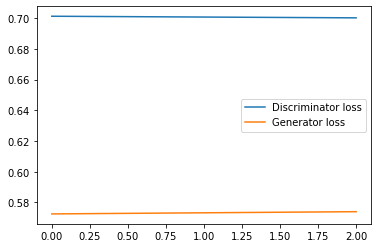

epoch: 4, step: 64


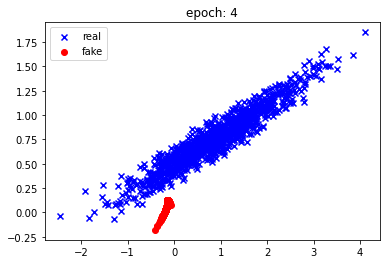

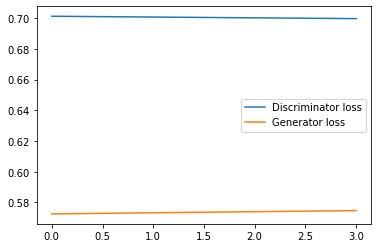

epoch: 5, step: 80


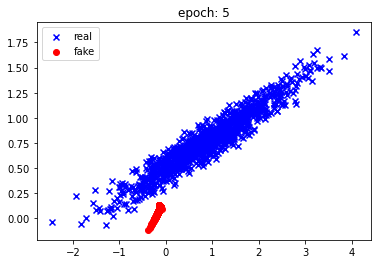

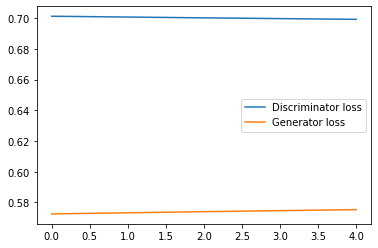

epoch: 6, step: 96


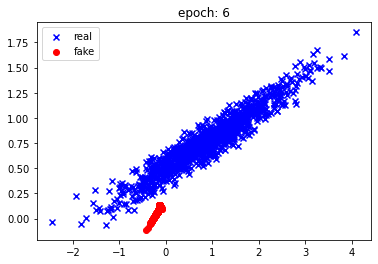

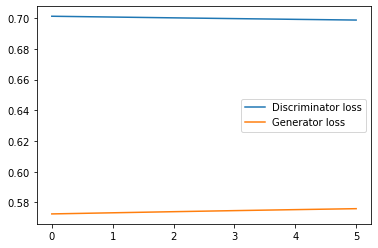

epoch: 7, step: 112


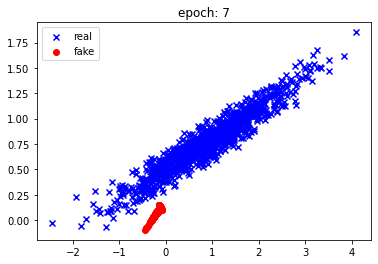

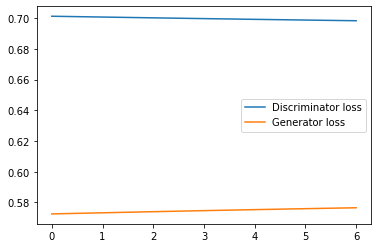

epoch: 8, step: 128


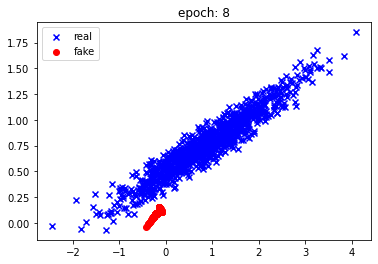

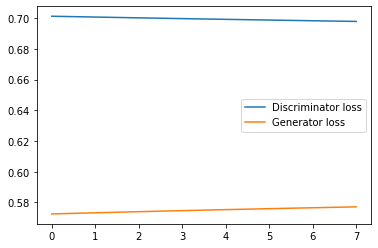

epoch: 9, step: 144


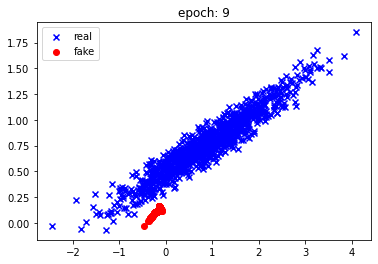

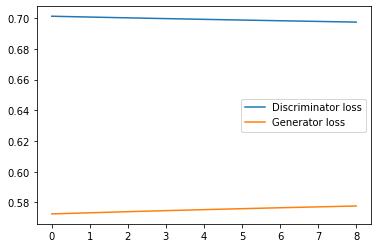

epoch: 10, step: 160


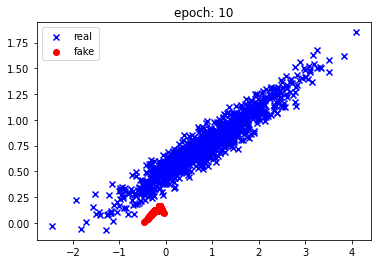

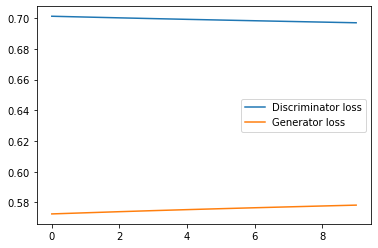

epoch: 11, step: 176


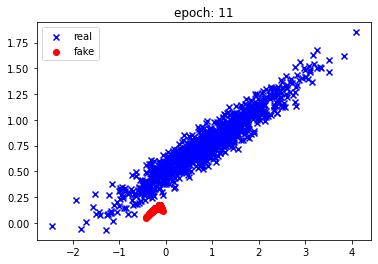

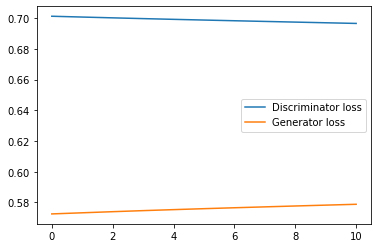

epoch: 12, step: 192


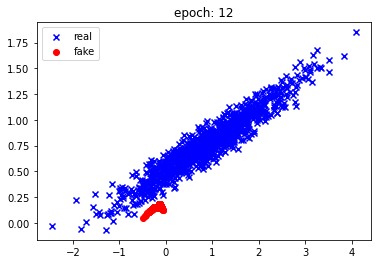

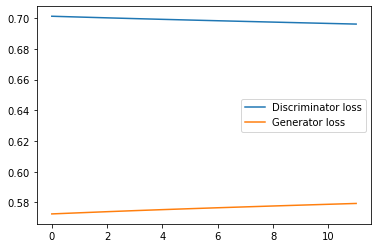

epoch: 13, step: 208


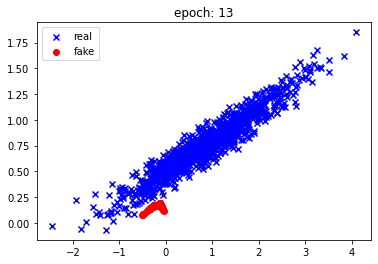

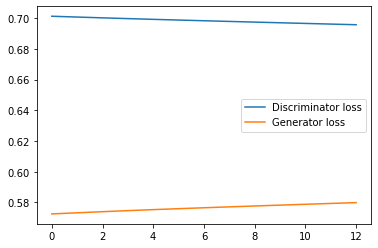

epoch: 14, step: 224


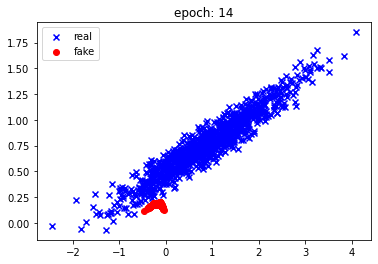

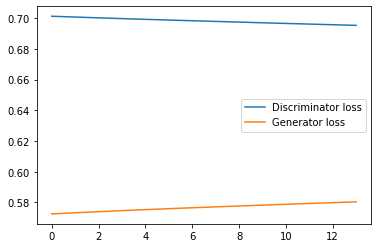

epoch: 15, step: 240


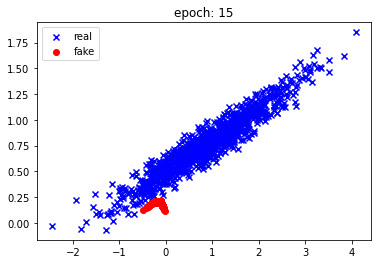

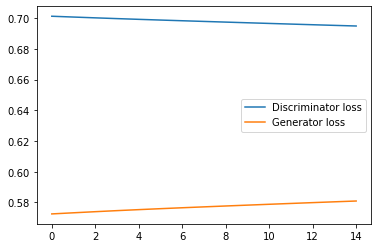

epoch: 16, step: 256


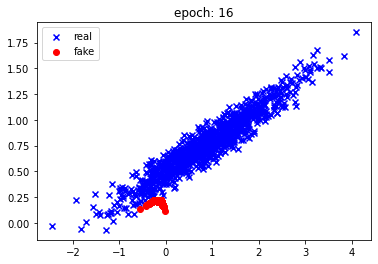

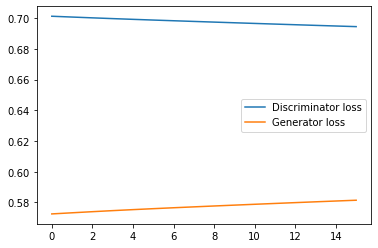

epoch: 17, step: 272


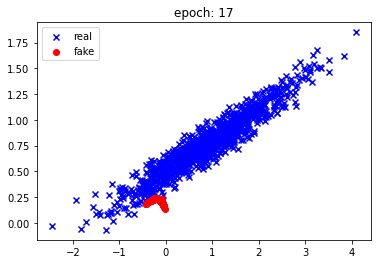

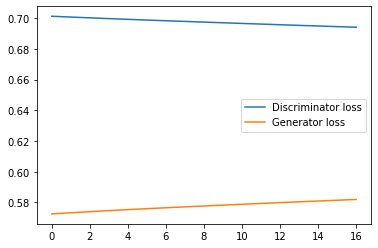

epoch: 18, step: 288


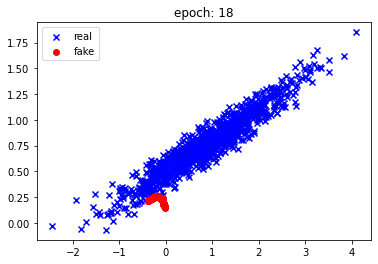

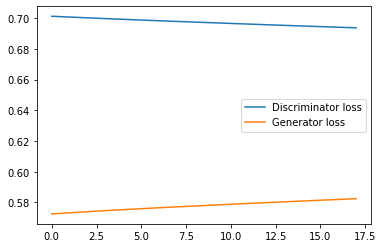

epoch: 19, step: 304


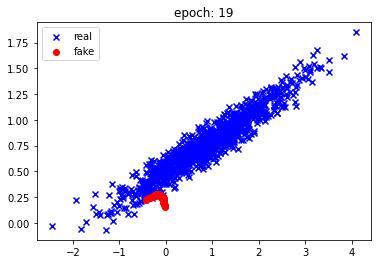

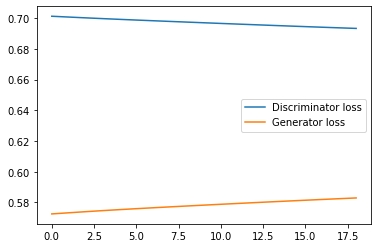

epoch: 20, step: 320


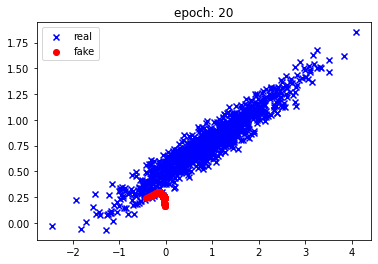

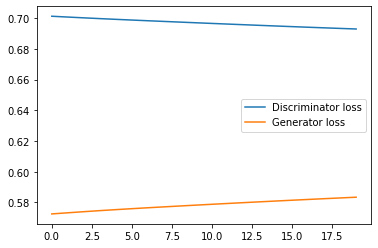

epoch: 21, step: 336


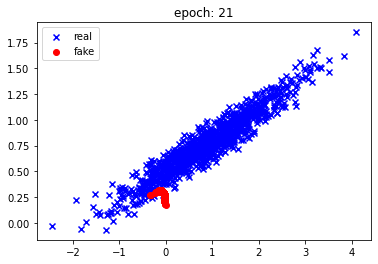

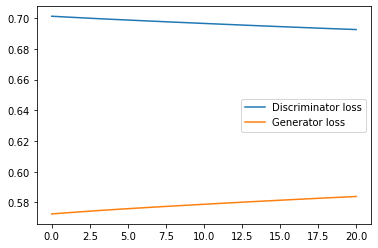

epoch: 22, step: 352


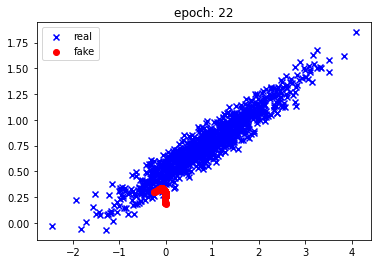

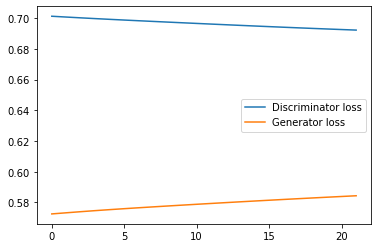

epoch: 23, step: 368


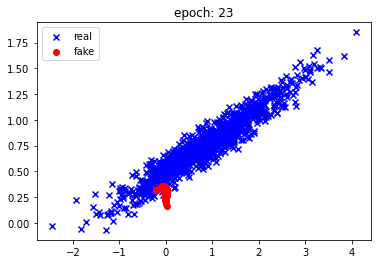

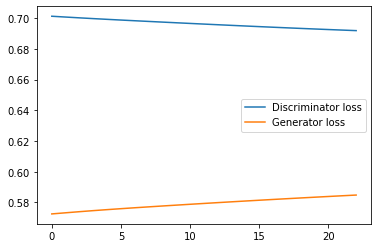

epoch: 24, step: 384


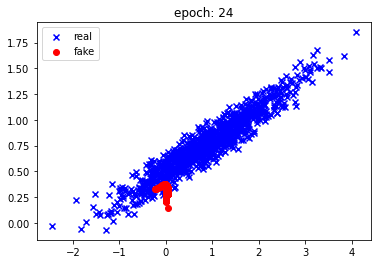

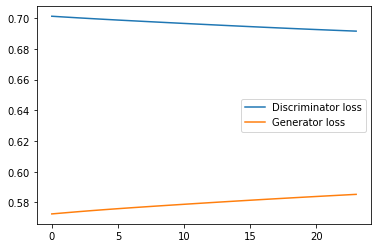

epoch: 25, step: 400


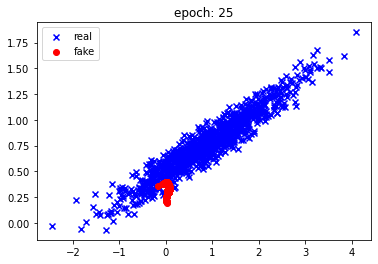

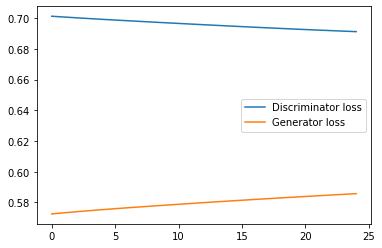

epoch: 26, step: 416


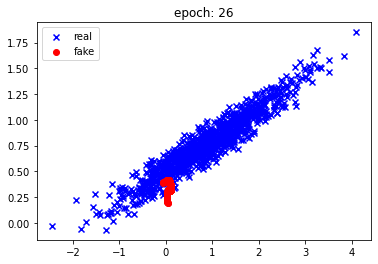

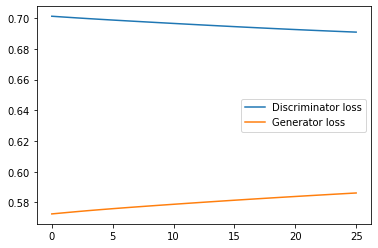

epoch: 27, step: 432


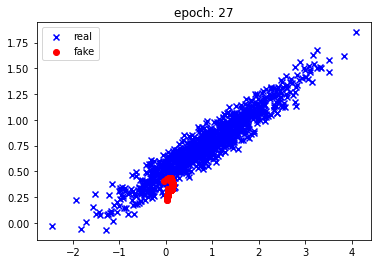

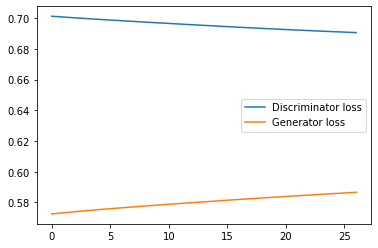

epoch: 28, step: 448


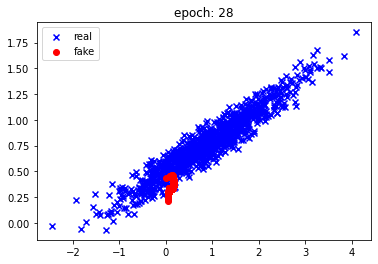

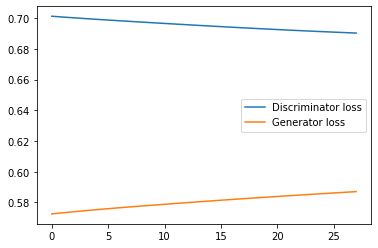

epoch: 29, step: 464


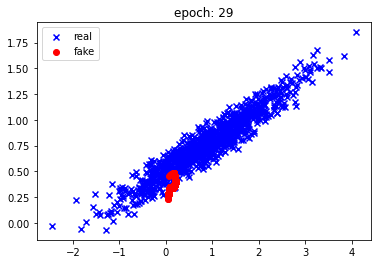

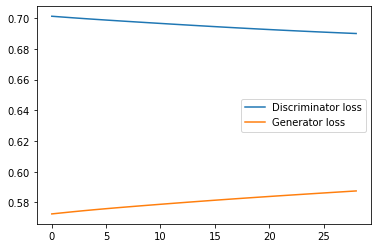

epoch: 30, step: 480


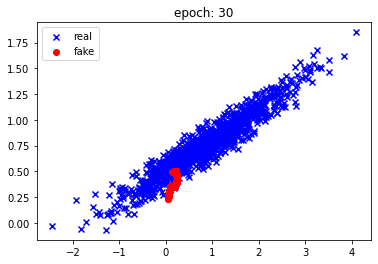

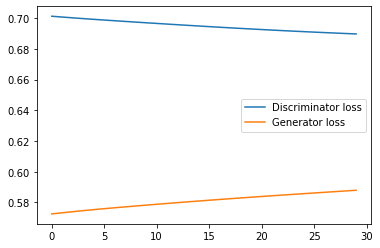

epoch: 31, step: 496


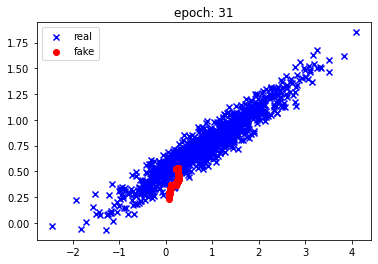

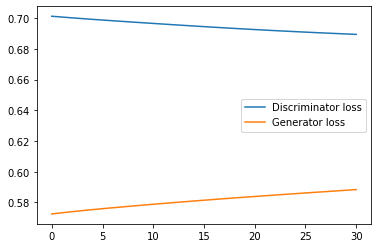

epoch: 32, step: 512


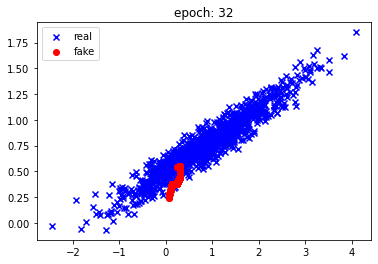

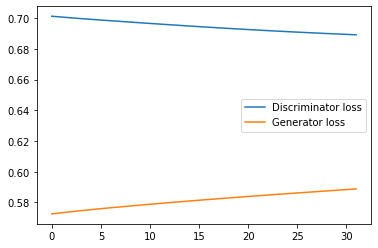

epoch: 33, step: 528


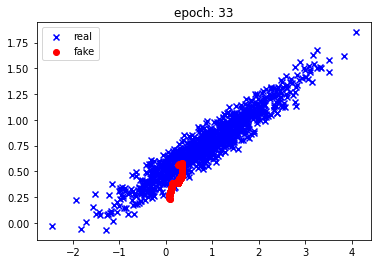

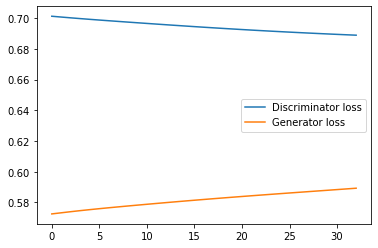

epoch: 34, step: 544


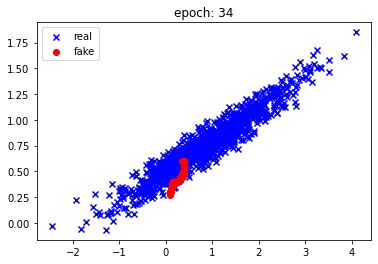

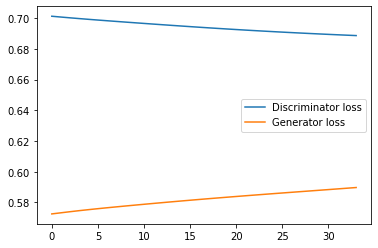

epoch: 35, step: 560


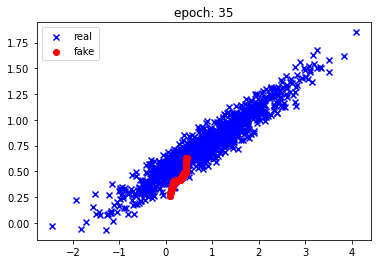

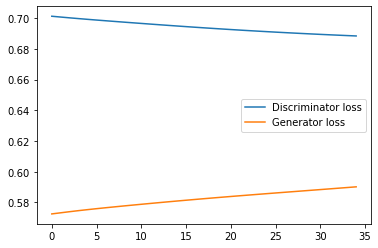

epoch: 36, step: 576


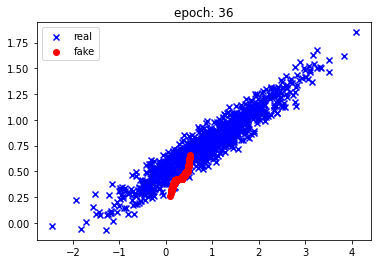

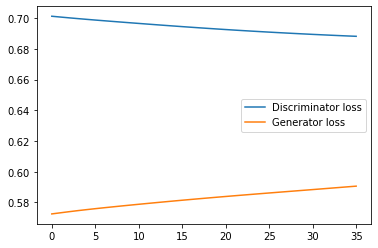

epoch: 37, step: 592


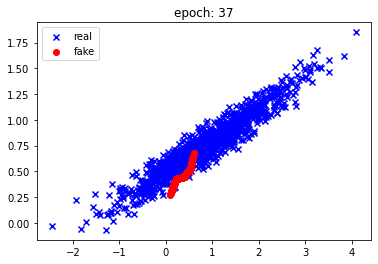

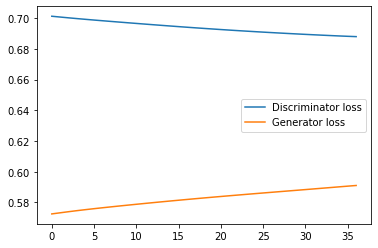

epoch: 38, step: 608


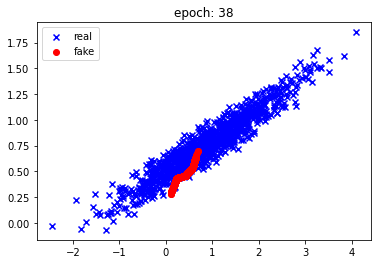

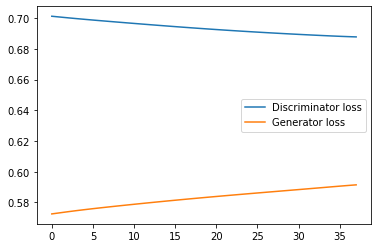

epoch: 39, step: 624


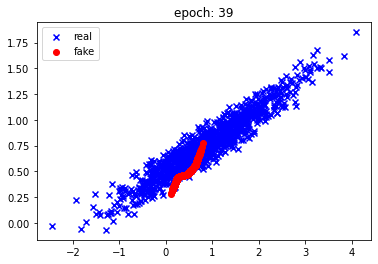

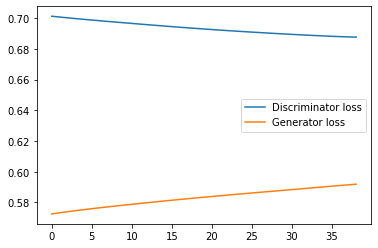

epoch: 40, step: 640


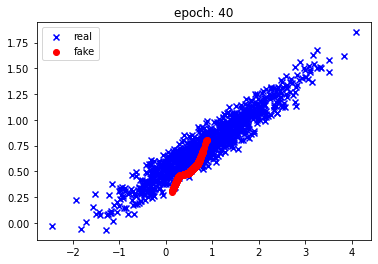

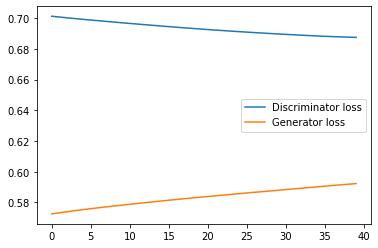

epoch: 41, step: 656


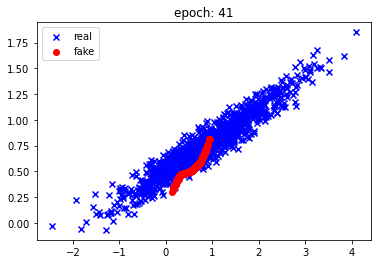

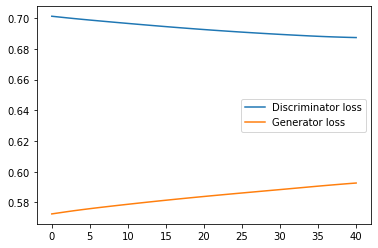

epoch: 42, step: 672


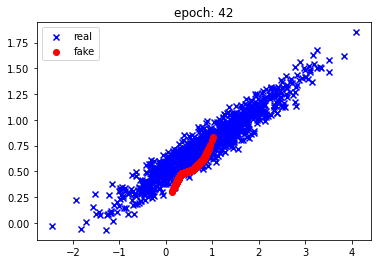

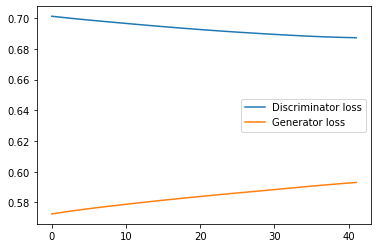

epoch: 43, step: 688


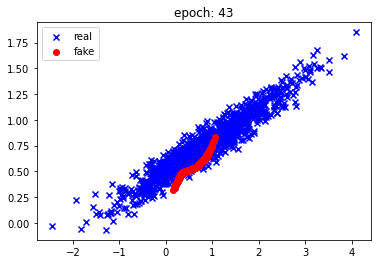

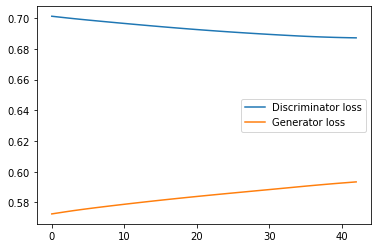

epoch: 44, step: 704


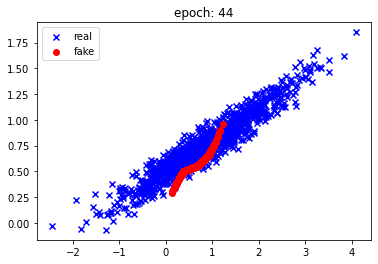

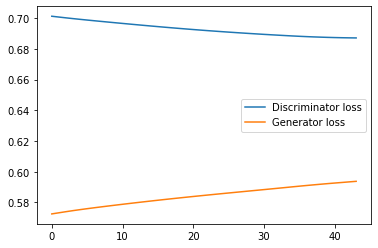

epoch: 45, step: 720


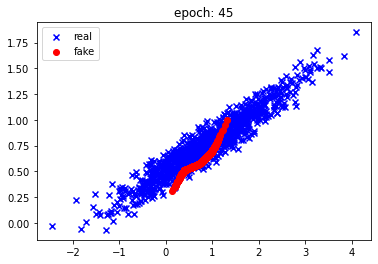

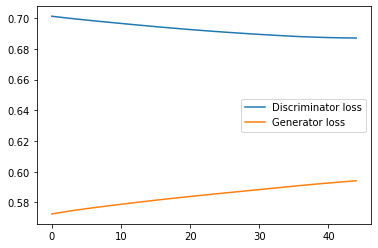

epoch: 46, step: 736


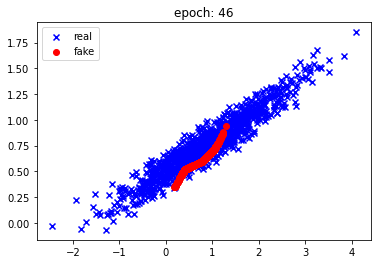

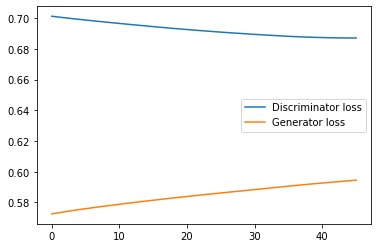

epoch: 47, step: 752


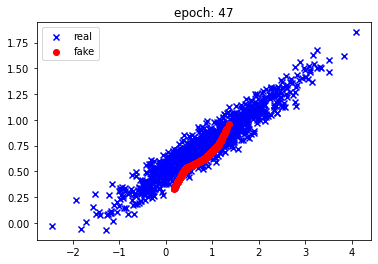

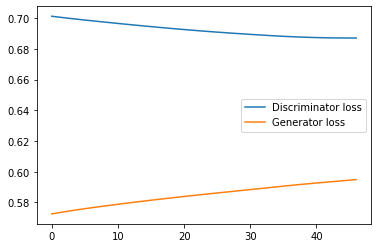

epoch: 48, step: 768


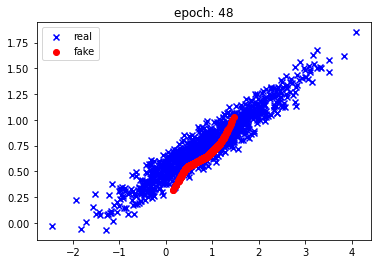

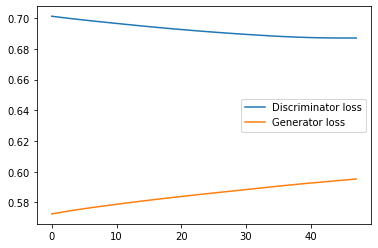

epoch: 49, step: 784


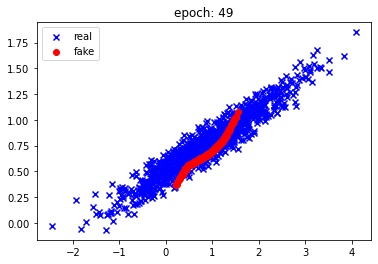

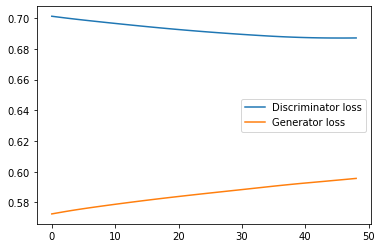

epoch: 50, step: 800


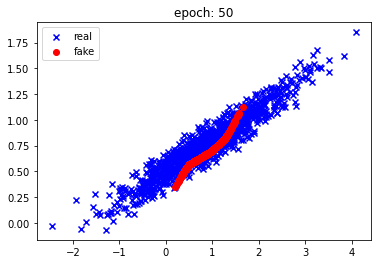

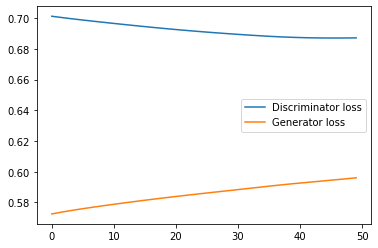

epoch: 51, step: 816


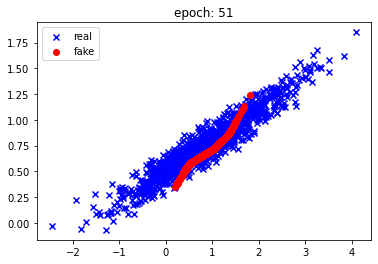

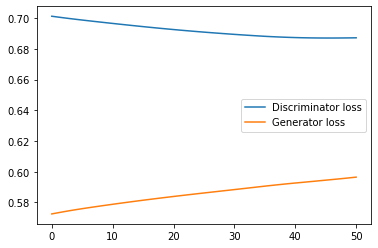

epoch: 52, step: 832


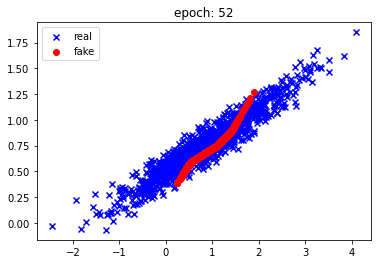

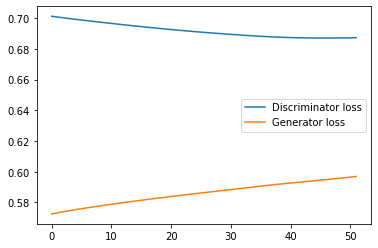

epoch: 53, step: 848


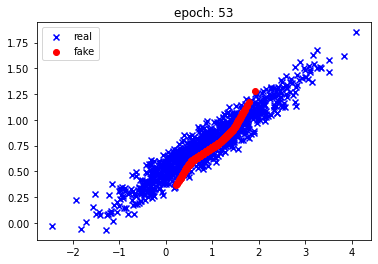

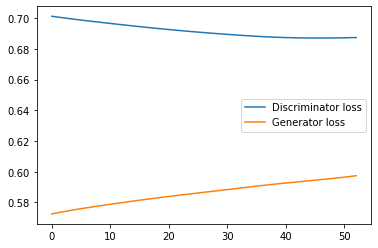

epoch: 54, step: 864


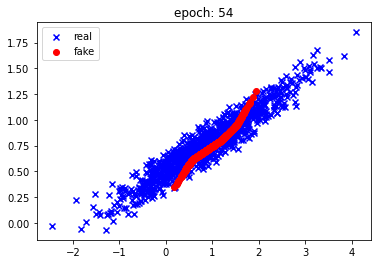

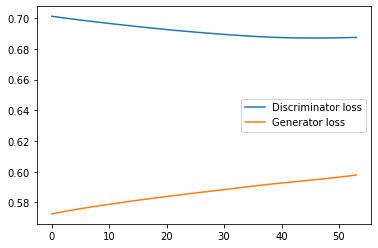

epoch: 55, step: 880


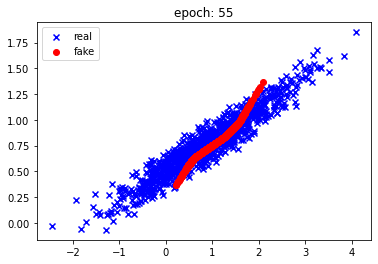

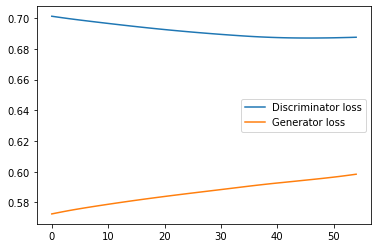

epoch: 56, step: 896


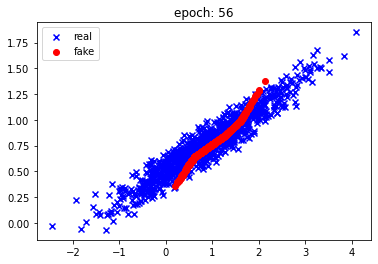

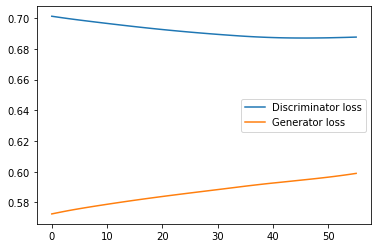

epoch: 57, step: 912


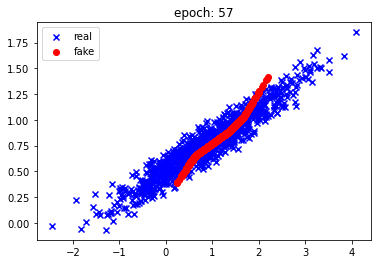

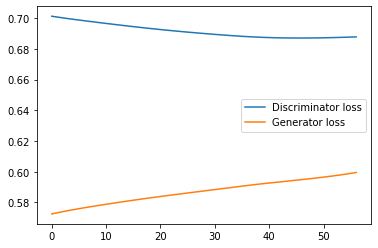

epoch: 58, step: 928


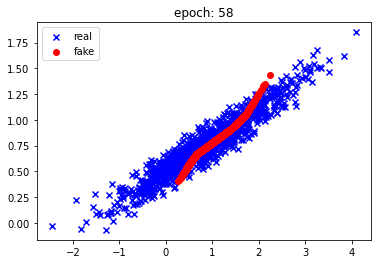

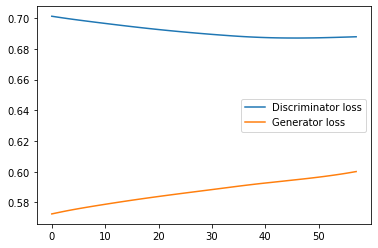

epoch: 59, step: 944


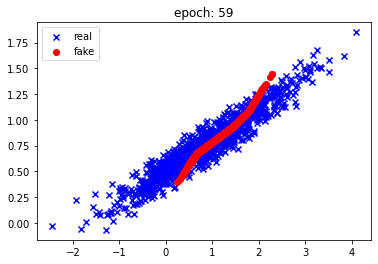

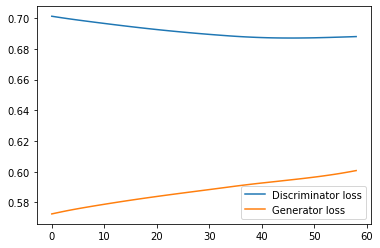

epoch: 60, step: 960


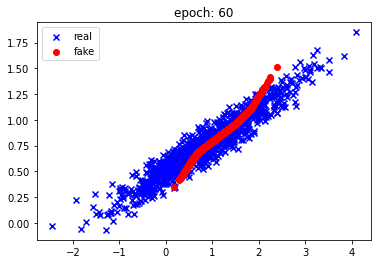

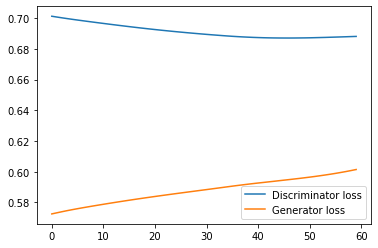

epoch: 61, step: 976


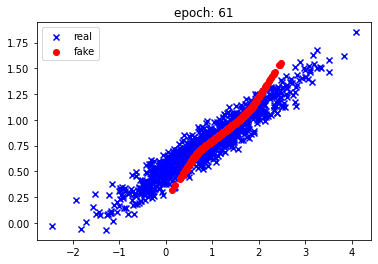

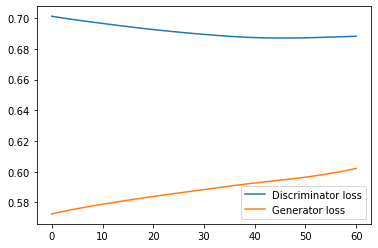

epoch: 62, step: 992


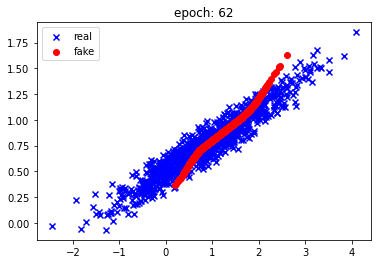

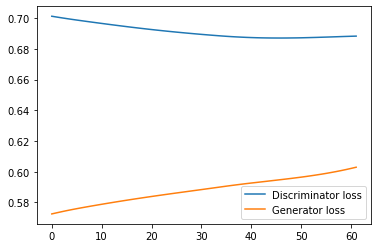

epoch: 63, step: 1008


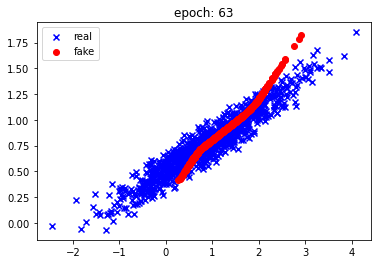

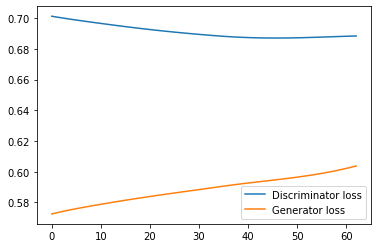

epoch: 64, step: 1024


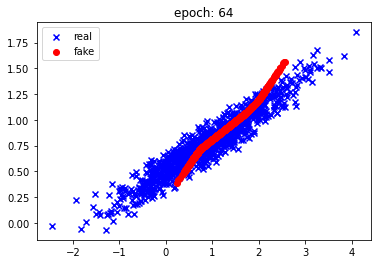

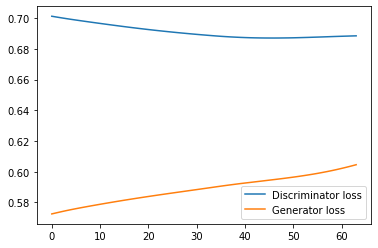

epoch: 65, step: 1040


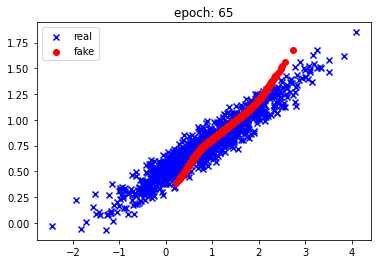

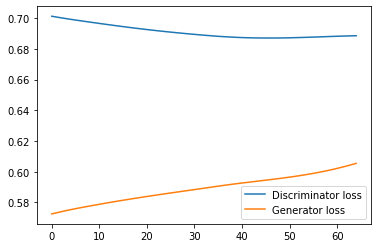

epoch: 66, step: 1056


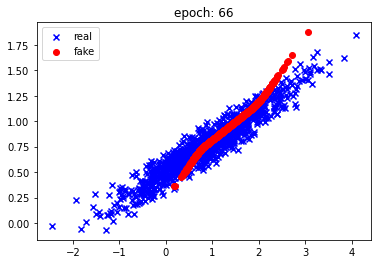

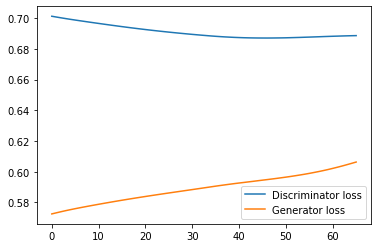

epoch: 67, step: 1072


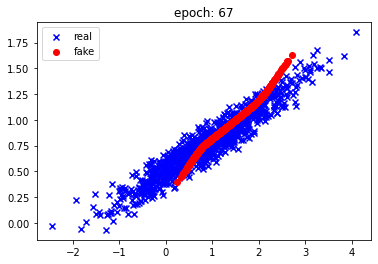

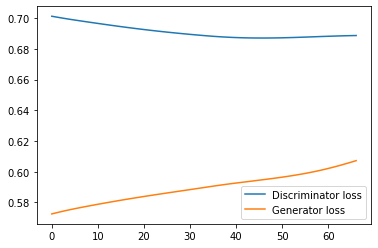

epoch: 68, step: 1088


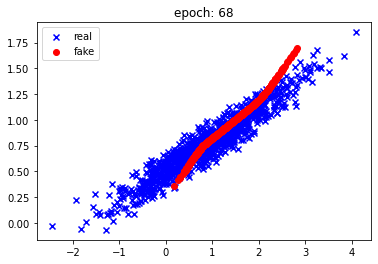

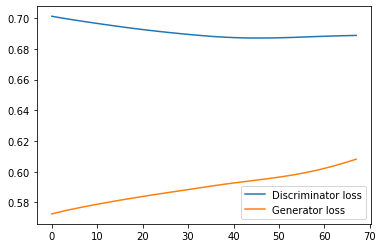

epoch: 69, step: 1104


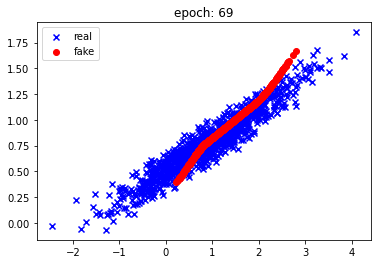

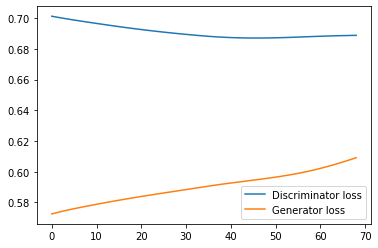

['_tmp/16.png', '_tmp/32.png', '_tmp/48.png', '_tmp/64.png', '_tmp/80.png', '_tmp/96.png', '_tmp/112.png', '_tmp/128.png', '_tmp/144.png', '_tmp/160.png', '_tmp/176.png', '_tmp/192.png', '_tmp/208.png', '_tmp/224.png', '_tmp/240.png', '_tmp/256.png', '_tmp/272.png', '_tmp/288.png', '_tmp/304.png', '_tmp/320.png', '_tmp/336.png', '_tmp/352.png', '_tmp/368.png', '_tmp/384.png', '_tmp/400.png', '_tmp/416.png', '_tmp/432.png', '_tmp/448.png', '_tmp/464.png', '_tmp/480.png', '_tmp/496.png', '_tmp/512.png', '_tmp/528.png', '_tmp/544.png', '_tmp/560.png', '_tmp/576.png', '_tmp/592.png', '_tmp/608.png', '_tmp/624.png', '_tmp/640.png', '_tmp/656.png', '_tmp/672.png', '_tmp/688.png', '_tmp/704.png', '_tmp/720.png', '_tmp/736.png', '_tmp/752.png', '_tmp/768.png', '_tmp/784.png', '_tmp/800.png', '_tmp/816.png', '_tmp/832.png', '_tmp/848.png', '_tmp/864.png', '_tmp/880.png', '_tmp/896.png', '_tmp/912.png', '_tmp/928.png', '_tmp/944.png', '_tmp/960.png', '_tmp/976.png', '_tmp/992.png', '_tmp/1008.pn

In [50]:
gan.train(n_epoch=70, dataloader=dataloader, x=x, viz_each=16, viz_to_gif=True)

In [ ]:
fake = gan.generate_fake(1000).detach().cpu().numpy()

In [ ]:
from scipy.spatial.distance import cdist

In [14]:
cdist(x, fake).mean()

48.53982672408034

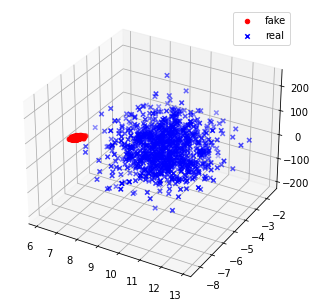

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(fake[:, 0], fake[:, 1], fake[:, 2], c='r', marker='o', label='fake')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c="b", marker='x', label='real')

plt.legend()
plt.show()

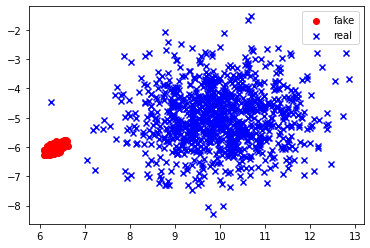

In [18]:

plt.scatter(fake[:, 0], fake[:, 1], c='r', marker='o', label='fake')
plt.scatter(x[:, 0], x[:, 1], c="b", marker='x', label='real')

plt.legend()
plt.show()

In [36]:
x.mean(axis=0)

array([ 9.99928569, -4.99080812])

In [10]:
import glob
import os

In [17]:
images = sorted([log for log in glob.glob("_tmp/*") if not os.path.isdir(log)],
                        key=lambda x: int(os.path.splitext(x)[0][5:]))

In [12]:
a = [log for log in glob.glob("_tmp/*") if not os.path.isdir(log)]

In [16]:
os.path.splitext(a[0])[0][5:]

'46'

In [18]:
images

['_tmp/2.png',
 '_tmp/4.png',
 '_tmp/6.png',
 '_tmp/8.png',
 '_tmp/10.png',
 '_tmp/12.png',
 '_tmp/14.png',
 '_tmp/16.png',
 '_tmp/18.png',
 '_tmp/20.png',
 '_tmp/22.png',
 '_tmp/24.png',
 '_tmp/26.png',
 '_tmp/28.png',
 '_tmp/30.png',
 '_tmp/32.png',
 '_tmp/34.png',
 '_tmp/36.png',
 '_tmp/38.png',
 '_tmp/40.png',
 '_tmp/42.png',
 '_tmp/44.png',
 '_tmp/46.png',
 '_tmp/48.png',
 '_tmp/50.png',
 '_tmp/52.png',
 '_tmp/54.png',
 '_tmp/56.png',
 '_tmp/58.png',
 '_tmp/60.png',
 '_tmp/62.png',
 '_tmp/64.png',
 '_tmp/66.png',
 '_tmp/68.png',
 '_tmp/70.png',
 '_tmp/72.png',
 '_tmp/74.png',
 '_tmp/76.png',
 '_tmp/78.png',
 '_tmp/80.png',
 '_tmp/82.png',
 '_tmp/84.png',
 '_tmp/86.png',
 '_tmp/88.png',
 '_tmp/90.png',
 '_tmp/92.png',
 '_tmp/94.png',
 '_tmp/96.png',
 '_tmp/98.png',
 '_tmp/100.png',
 '_tmp/102.png',
 '_tmp/104.png',
 '_tmp/106.png',
 '_tmp/108.png',
 '_tmp/110.png',
 '_tmp/112.png',
 '_tmp/114.png',
 '_tmp/116.png',
 '_tmp/118.png',
 '_tmp/120.png',
 '_tmp/122.png',
 '_tmp/124.png',